https://towardsdatascience.com/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import SpectralClustering

In [2]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()
from tqdm.notebook import tqdm
import csv

In [3]:
df = pd.read_csv('UCI/HTRU_2.csv', names=["l1", "l2", "l3", "l4","l5","l6","l7","l8","l9"])
df

,l1,l2,l3,l4,l5,l6,l7,l8,l9
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [4]:
y=df["l9"]
y

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: l9, Length: 17898, dtype: int64

In [5]:
df=df.iloc[:,[0,1,2,3,4,5,6,7]]

In [6]:
df

,l1,l2,l3,l4,l5,l6,l7,l8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [ ]:
# k=clustering number
k=2
cluster=SpectralClustering(n_clusters=k)
cluster.fit(df)
yy=cluster.labels_

In [6]:
df = df.mask(np.random.choice([True, False], size=df.shape, p=[.20,.80]))
df

,l1,l2,l3,l4,l5,l6,l7,l8
0,NaN,55.683782,-0.234571,-0.699648,NaN,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,NaN,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,NaN,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,NaN,40.672225,0.600866,1.123492,NaN,NaN,14.269573,NaN
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,NaN,NaN,15.450260,NaN
17894,122.554688,49.485605,0.127978,0.323061,16.409699,NaN,2.945244,8.297092
17895,119.335938,NaN,0.159363,NaN,21.430602,58.872000,NaN,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [21]:
table2=df[0:200]
# x,y=table2.shape
# print(x,y)

In [8]:
for k in tqdm(range(100)):
    W=[[0.0 for i in range(x)] for j in range(x)]
    for i in range(x):
        for j in range(i+1,x,1):
            z=table2[i:i+1:].append(table2[j:j+1:], ignore_index=True)
            z=z.dropna(axis=1)
            if z.shape[1] == 0:
                continue
            W[i][j]=W[j][i]=pairwise_distances(z.values,metric="l1")[0][1]
            del(z)
        #print(i)
print(W)
with open("HTRU2_1.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(W)



[[0.0, 64.08568816099998, 32.595113313, 25.300684507000007, 23.964175356999995, 75.231862463, 434.34808978399997, 134.365889549, 10.263004884, 41.65620317099999, 48.295325679, 144.17942807600002, 93.27213549999999, 25.307292180000008, 64.333591739, 29.653097899, 155.031536669, 9.12346762999999, 79.16382159099999, 139.701961048, 10.285800774999997, 17.821676925999995, 128.81177086699998, 56.15047496, 25.842860779000006, 80.84578040699999, 50.34501489099999, 24.826529190000002, 45.440886216999985, 107.15313087599998, 185.814846604, 437.1942695309999, 77.38740542100001, 11.313783661999999, 37.35490936699999, 114.05762189699998, 21.408600953000004, 42.286807221, 213.36994723199996, 16.767564412, 17.61152087900001, 25.578232290999996, 159.85668291600004, 22.375286413000005, 165.782662094, 59.771848670000026, 20.387592059999996, 159.813172609, 45.082996161000004, 47.82492867000002, 150.07502574999998, 17.561051541999994, 38.882407456, 387.584321019, 13.545329911999998, 17.661501354999995, 4

In [3]:
df = pd.read_csv("HTRU2_1.csv",header=None)

In [4]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,64.085688,32.595113,25.300685,23.964175,75.231862,434.348090,134.365890,10.263005,41.656203,...,23.042113,47.347830,12.303077,72.394885,52.048804,40.966680,157.203581,29.442230,134.437104,100.405832
1,64.085688,0.000000,95.703693,85.937906,23.677418,26.480970,394.503976,74.910692,13.644379,108.722991,...,106.171506,47.824692,10.502562,171.305256,129.367072,71.025412,131.276059,114.337678,101.521542,47.460007


In [5]:
kk=df.values.tolist()
len(kk)

200

In [6]:
kkk=np.array(kk)
kkk=kkk[:500,:500]
kkk

array([[0.000, 64.086, 32.595, ..., 29.442, 134.437, 100.406],
       [64.086, 0.000, 95.704, ..., 114.338, 101.522, 47.460],
       [32.595, 95.704, 0.000, ..., 54.366, 153.714, 111.506],
       ...,
       [29.442, 114.338, 54.366, ..., 0.000, 207.062, 127.145],
       [134.437, 101.522, 153.714, ..., 207.062, 0.000, 30.903],
       [100.406, 47.460, 111.506, ..., 127.145, 30.903, 0.000]])

In [7]:
vectorizer = np.vectorize(lambda x: 1 if x < 100 else 0)

Ww = np.vectorize(vectorizer)(kk)

In [8]:
# degree matrix
D = np.diag(np.sum(np.array(Ww), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - Ww
print('laplacian matrix:')
print(L)

degree matrix:
[[157   0   0 ...   0   0   0]
 [  0 128   0 ...   0   0   0]
 [  0   0 137 ...   0   0   0]
 ...
 [  0   0   0 ... 138   0   0]
 [  0   0   0 ...   0  81   0]
 [  0   0   0 ...   0   0 133]]
laplacian matrix:
[[156  -1  -1 ...  -1   0   0]
 [ -1 127  -1 ...   0   0  -1]
 [ -1  -1 136 ...  -1   0   0]
 ...
 [ -1   0  -1 ... 137   0   0]
 [  0   0   0 ...   0  80  -1]
 [  0  -1   0 ...   0  -1 132]]


In [9]:
e, v = np.linalg.eigh(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[0.000 3.553 6.199 6.402 9.320 14.919 17.447 41.559 45.805 47.338 50.000
 50.000 55.981 62.888 64.588 65.481 67.769 69.513 73.282 76.183 76.906
 77.857 78.364 80.150 81.800 83.018 84.288 85.924 86.108 86.791 88.707
 89.759 92.554 93.353 94.309 94.806 96.030 96.271 97.320 98.180 98.917
 99.965 100.180 101.950 104.912 105.255 105.908 106.033 107.103 107.652
 108.627 111.043 113.583 115.596 117.116 119.051 119.371 119.825 119.992
 120.779 121.395 121.907 122.495 123.614 124.456 124.977 125.426 125.871
 126.060 126.974 127.673 128.162 128.383 128.598 129.047 130.318 131.858
 131.917 132.125 132.726 132.890 133.110 133.565 133.782 134.421 134.641
 134.930 134.967 135.034 135.230 135.437 137.019 137.418 137.542 138.336
 138.432 139.418 139.637 140.096 140.241 140.583 140.675 141.098 141.371
 142.191 142.502 142.600 142.878 142.964 143.283 143.323 143.684 144.125
 144.454 145.000 145.033 145.112 145.262 145.366 145.445 145.860 146.054
 146.294 146.453 146.580 146.742 147.055 147.

In [10]:
np.where(e<100000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

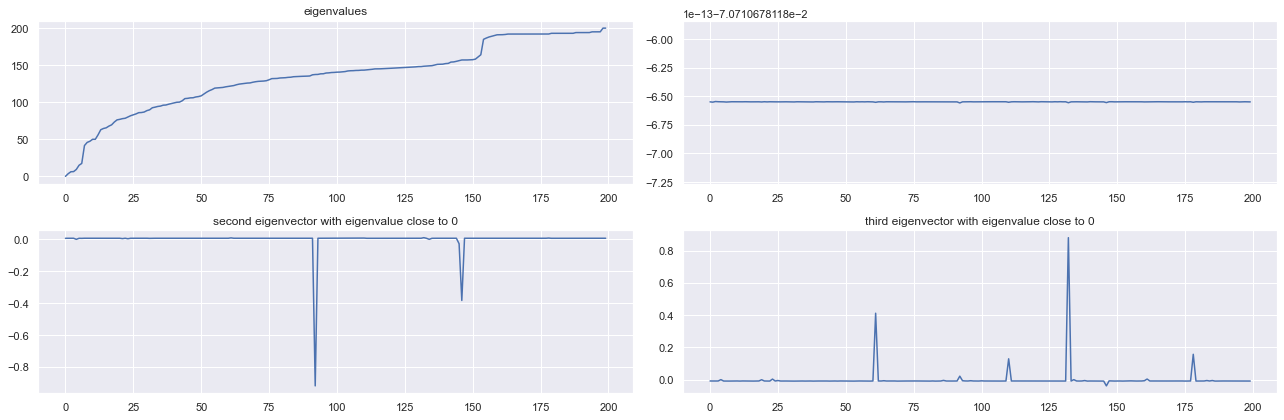

In [11]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10000)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

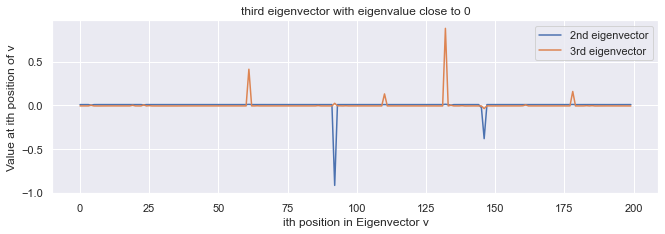

In [12]:
fig = plt.figure(figsize=[18, 6])
ax3 = plt.subplot(221)
plt.plot(v[:, i[1]], label="2nd eigenvector")#, marker = 'o')
plt.legend()
plt.xlabel("ith position in Eigenvector v")
plt.ylabel("Value at ith position of v")
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(221)
plt.plot(v[:, i[2]], label="3rd eigenvector")#, marker = 'o')
plt.legend()
plt.xlabel("ith position in Eigenvector v")
plt.ylabel("Value at ith position of v")
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

In [13]:
df1=pd.DataFrame(v[:, i[1]])
df2=pd.DataFrame(v[:, i[2]])
df=pd.concat([df1, df2], axis=1)
df.columns=['2nd eigenvector','3rd eigenvector']
writer = pd.ExcelWriter('htru2_results.xlsx', engine = 'xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [12]:
U = np.array(v[:, i[0]])

In [13]:
km = KMeans(init='k-means++', n_clusters=2)
km.fit(U.reshape(-1, 1))
km.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [17]:
purity_score(km.labels_, y[:200])

0.97

In [18]:
print(f1_score(km.labels_, y[:200], average="weighted"))
print(precision_score(km.labels_, y[:200], average="weighted"))
print(recall_score(km.labels_, y[:200], average="weighted"))   

0.9731762652705059
0.978985088985089
0.97


In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [ ]:
print(purity_score(yy, y))
print(precision_score(yy, y, average="weighted"))

In [22]:
features=table2
labels = pd.DataFrame(km.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledColleges = pd.concat((features,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)

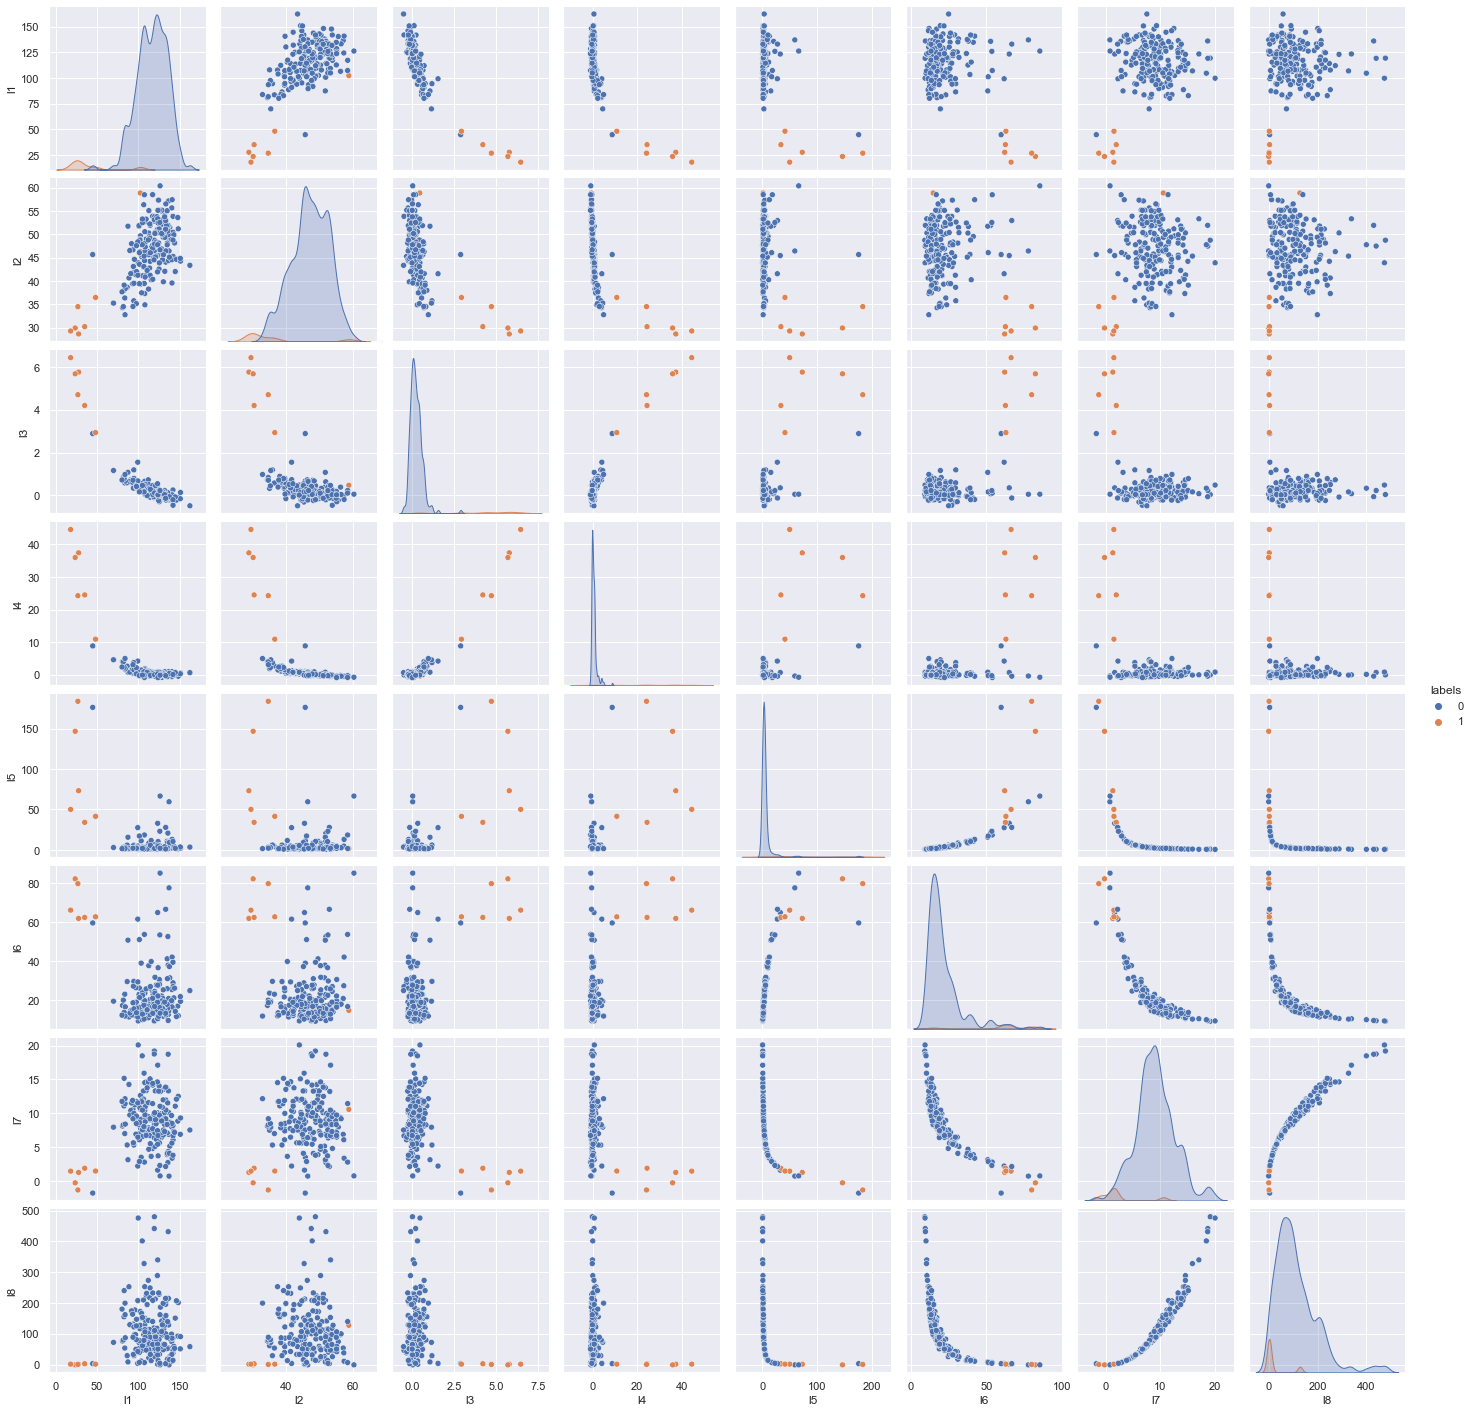

In [19]:
sns.pairplot(labeledColleges,hue='labels',diag_kws={'bw': 0.2})

In [ ]:
#sns.lmplot(x='Top10perc',y='S.F.Ratio',data=labeledColleges,hue='labels',fit_reg=False)

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels, metric='euclidean', sample_size=None, random_state=None)

0.4136668573591365